<a href="https://colab.research.google.com/github/michaelventura01/AVOCADO/blob/main/Chat_bot_Sentiment_Analysis_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis using BERT
**Bidirectional Encoder Representations from Transformers.**
Es un modelo de lenguaje desarrollado por Google en 2018 que revolucionó el procesamiento de lenguaje natural (NLP) por su capacidad para entender el contexto completo de una palabra en una oración.

### **Título: Sentiment analysis classification system using hybrid BERT models**
#### **Autor: Amira Samy Talaat et al.**
#### **Revista: Journal of Big Data (Vol. 10, Artículo n.º 110, 2023)**

#### **Enlace:** https://journalofbigdata.springeropen.com/articles/10.1186/s40537-023-00781-w

https://huggingface.co/verneylmavt/bert-base-uncased_sentiment-analysis

### **Resumen:** El estudio propone diversos modelos híbridos basados en BERT combinados con capas de BiLSTM y BiGRU para realizar clasificación de sentimiento en comentarios de redes sociales, comparando rendimiento frente a modelos clásicos.


### **Objetivo del estudio**

El estudio busca mejorar la precisión del análisis de sentimiento (positivo, negativo, neutral) en textos de redes sociales mediante modelos híbridos que combinan versiones pre‑entrenadas de BERT con capas adicionales de redes recurrentes (específicamente BiLSTM y BiGRU).


#### **Metodología**

Se utilizan tres conjuntos de datos públicos de tweets con etiquetas de sentimiento (positivo/negativo/neutral).

Se comparan las siguientes técnicas:

* Modelos clásicos de aprendizaje automático (árboles de decisión, SVM, Naive Bayes, regresión logística, etc.).


* Modelos basados en BERT pre‑entrenado (dos variantes: uno tipo “BERT base” / RoBERTa, otro “DistilBERT” más liviano).


* Modelos híbridos donde al BERT/DistilBERT se le añaden capas de BiGRU/BiLSTM (por ejemplo: BERT → BiGRU → BiLSTM → BiGRU).

* Se prueba el impacto de incluir o eliminar emojis en el pre‑procesamiento del texto para ver si estos símbolos afectan la clasificación.

* Preprocesamiento: normalización de texto, eliminación de hashtags, URLs, números, puntuación, opcionalmente emojis. Tokenización para BERT.

* **Configuración de entrenamiento:** optimizador AdamW, tasa de aprendizaje de 5e‑5, batch size 16, epochs 10, división de datos 80% entrenamiento / 10% validación / 10% prueba.
SpringerOpen

#### **Resultados**

Los modelos híbridos (BERT + BiGRU/BiLSTM) superan en precisión a los modelos clásicos.

En particular, las mejores combinaciones fueron:

* **Para conjuntos grandes:** RoBERTa con capas BiGRU (3 capas “3G”) obtuvo ~91.72% en el dataset más pequeño.

* DistilBERT con configuración GLG (BiGRU → BiLSTM → BiGRU) obtuvo mejoras de precisión respecto a DistilBERT sin capas extra: hasta +1.84% en el dataset “Apple”.

* La presencia o ausencia de emojis sí afectó la precisión: eliminar emojis hizo caer el rendimiento en algunos casos.

* GRU (gated recurrent units) demostraron mejor eficiencia computacional que LSTM en este contexto, sin pérdida de precisión clara.

#### **Conclusiones**

* El enfoque híbrido de BERT + BiGRU/BiLSTM es una vía prometedora para mejorar la clasificación de sentimientos en texto corto de redes sociales.

* Los modelos más ligeros (como DistilBERT) con capas adicionales pueden acercarse al rendimiento de modelos más grandes (RoBERTa) con menor coste computacional.

* La eliminación de emojis no siempre es benéfica: en ciertos datasets, los emojis constituyen señales que ayudan a la clasificación.

* Para futuras líneas de trabajo, la autora sugiere combinar estos modelos con algoritmos clásicos de clasificación de texto y explorar nuevas técnicas de extracción y selección de características.

### ANALISIS DEL MODELO BERT


#### **Ventajas**

**Mejor comprensión de las emociones del usuario:**

* El análisis de sentimiento con BERT permite que el chatbot entienda si el usuario está contento, molesto o neutral, lo que ayuda a responder de forma más empática y adecuada.

* **Modelos preentrenados muy potentes:**
Usar BERT y la librería Hugging Face evita tener que entrenar desde cero, ahorrando tiempo y recursos.

* **Fácil de implementar:**
La API pipeline de Hugging Face facilita mucho añadir análisis de sentimiento y construir un chatbot básico en pocas líneas de código.

* **Flexible:**
Puedes personalizar respuestas según el sentimiento detectado o incluso usarlo para decidir cuándo pasar la conversación a un agente humano.

* **Ligero para casos simples:**
Ideal para chatbots básicos donde la comprensión del sentimiento mejora la experiencia del usuario sin necesidad de infraestructuras complejas.

#### **Desventajas**

* **Conversación limitada:**
El chatbot solo responde según el sentimiento, no entiende el contexto, preguntas complejas ni recuerda interacciones previas.

* **Análisis de sentimiento muy general:**
Los sentimientos suelen clasificarse en positivo, negativo o neutral, lo que puede simplificar demasiado y perder matices emocionales.

* **No adaptado a dominios específicos:**
Los modelos preentrenados pueden funcionar mal con textos especializados (médico, legal, técnico) sin entrenamiento adicional.

* **Rendimiento y latencia:**
Ejecutar BERT puede ser costoso en recursos y lento para respuestas en tiempo real si hay muchos usuarios simultáneos.

* **Sin gestión avanzada de diálogo:**
No tiene capacidades para manejar flujos conversacionales complejos, entender intenciones o extraer información (slots) como herramientas especializadas.

* **Dependencia de librerías y modelos externos:**
El proyecto depende de servicios o modelos de terceros (como Hugging Face), que podrían cambiar y afectar el funcionamiento.


#### **Resumen**
<table>
<tr><th>Ventajas</th><th>	Desventajas</th></tr>
<tr><td>Mejor entendimiento emocional</td><td>	Conversación simple y sin contexto</td></tr>
<tr><td>Modelos potentes preentrenados</td><td>Sentimiento muy general<td></tr>
<tr><td>Fácil y rápido de implementar</td><td>No adaptado a dominios específicos<td></tr>
<tr><td>Flexible y personalizable</td><td>Requiere recursos computacionales<td></tr>
<tr><td>Ligero para casos sencillos</td><td>Sin gestión avanzada de diálogo<td></tr>
</table>


### PREPARANDO AMBIENTE

In [ ]:
pip install transformers torch

In [ ]:
from transformers import pipeline
from transformers import pipeline
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### PRUEBA UNITARIA DE MODELO

In [ ]:
# Load pre-trained sentiment-analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Sample texts
texts = [
    "I love this product! It's amazing.",
    "This is the worst experience I've ever had.",
    "It's okay, nothing special."
]

# Analyze sentiment
results = sentiment_analyzer(texts)

for text, result in zip(texts, results):
    print(f"Text: {text}\nSentiment: {result['label']}, Confidence: {result['score']:.4f}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Text: I love this product! It's amazing.
Sentiment: POSITIVE, Confidence: 0.9999

Text: This is the worst experience I've ever had.
Sentiment: NEGATIVE, Confidence: 0.9998

Text: It's okay, nothing special.
Sentiment: NEGATIVE, Confidence: 0.8190



### VALIDACION DE MODELO

Device set to use cpu


Matriz de Confusión:
 [[3 0]
 [0 3]]

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       1.00      1.00      1.00         3
    Positivo       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



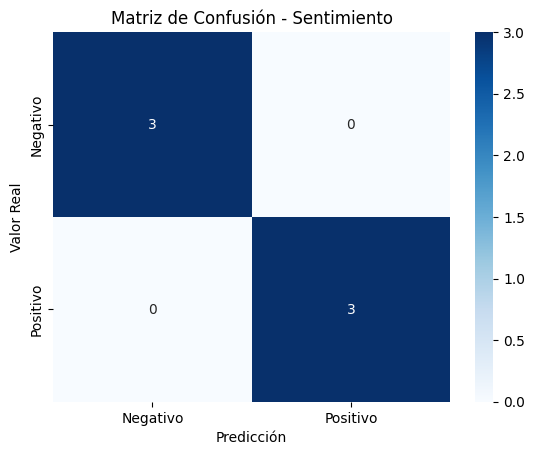

In [ ]:
# Cargar modelo BERT multilingüe para análisis de sentimiento
modelo = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Datos de prueba (ejemplo: español e inglés)
# Etiquetas verdaderas: positivo = 1, negativo = 0
datos = [
    {"texto": "Este producto es excelente", "label": 1},
    {"texto": "No me gustó nada", "label": 0},
    {"texto": "Muy satisfecho con el servicio", "label": 1},
    {"texto": "Terrible atención al cliente", "label": 0},
    {"texto": "It's amazing!", "label": 1},
    {"texto": "Worst experience ever", "label": 0}
]

# Predecir y convertir predicciones a binario
def convertir_prediccion(pred):
    estrellas = int(pred['label'][0])
    return 1 if estrellas >= 4 else 0

# Ejecutar predicciones
y_true = []
y_pred = []

for item in datos:
    resultado = modelo(item['texto'])[0]
    pred = convertir_prediccion(resultado)
    y_true.append(item['label'])
    y_pred.append(pred)

# Mostrar matriz de confusión
matriz = confusion_matrix(y_true, y_pred)
print("Matriz de Confusión:\n", matriz)

# Reporte de métricas
print("\nReporte de Clasificación:")
print(classification_report(y_true, y_pred, target_names=["Negativo", "Positivo"]))

# Graficar matriz de confusion
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Sentimiento")
plt.show()

### IMPLEMENTACION DE CHATBOT

In [ ]:
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def analizar_sentimiento(texto):
    resultado = classifier(texto)[0]
    estrellas = int(resultado['label'][0])  # modelo da una puntuación de 1 a 5 estrellas
    if estrellas <= 2:
        sentimiento = "Negativo"
    elif estrellas == 3:
        sentimiento = "Neutral"
    else:
        sentimiento = "Positivo"
    return sentimiento, resultado['score']

def chatbot():
    print("Chatbot con análisis de sentimiento (Español/Inglés)")
    print("Escribe 'salir' para terminar.\n")
    while True:
        texto = input("Tú: ")
        if texto.lower() in ['salir', 'exit']:
            print("Bot: ¡Hasta luego!")
            break
        sentimiento, confianza = analizar_sentimiento(texto)
        print(f"Sentimiento detectado: {sentimiento} (confianza: {confianza:.2f})")

        # respuesta del bot segun el sentimiento
        if sentimiento == "Positivo":
            print("Bot: ¡Me alegra escuchar eso!\n")
        elif sentimiento == "Negativo":
            print("Bot: Lo siento mucho ¿Cómo puedo ayudarte?\n")
        else:
            print("Bot: Entiendo. ¿Quieres contarme más?\n")



Device set to use cpu


### EJECUCION DEL CHAT

In [ ]:
chatbot()

Chatbot con análisis de sentimiento (Español/Inglés)
Escribe 'salir' para terminar.

Tú: Me siento normal
Sentimiento detectado: Neutral (confianza: 0.40)
Bot: Entiendo. ¿Quieres contarme más?

Tú: Quisiera ver más allá
Sentimiento detectado: Neutral (confianza: 0.34)
Bot: Entiendo. ¿Quieres contarme más?

Tú: Me gusta el color de esa app
Sentimiento detectado: Positivo (confianza: 0.50)
Bot: ¡Me alegra escuchar eso!

Tú: Esa lentitud no es agradable
Sentimiento detectado: Negativo (confianza: 0.51)
Bot: Lo siento mucho ¿Cómo puedo ayudarte?

Tú: salir
Bot: ¡Hasta luego!
